# Step 2: Exploratory Data Analysis

## Introduction: Overview of Data Science Problem
With the current population of London at around 9,648,000, and a trend of ~1-1.5% population increase per year over the past few years1, the importance of urban design has become an important consideration for the city’s urban planning commissions. Over the past few years, London’s local government has been making a push for “greening London”; the London Plan 2021 outlines an integrated environmental strategy for increasing urban greenspace, as well as improving air quality and mitigating the effects of climate change. <br>
<br>
The focus of this project will be on developing a model to predict which factors, including access to urban greenspace, are most important for predicting longevity within the London boroughs. I will use data from the London Ward Well-Being Scores dataset, collected by the Greater London Authority over the period of 2009-2013. This dataset includes information on life-expectancy, as well as 12 different well-being indicators such as childhood obesity rates, crime rates, unemployment rates, and access to greenspace and public transport. 

### Load Data and Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Import clean data
datapath = '/Users/kbrewitt/Springboard/Springboard-Capstone-2/clean_data/London_data_cleaned.csv'
df = pd.read_csv(datapath, index_col=0)

In [3]:
# Check imported data
# Rename columns
df.rename(columns={'Unauthorised_School_Absence':'School_Absence', 'Borough Green Space Surface':'Greenspace_SA', 'Dependent_children':'Dependent_Children'}, inplace=True)

df.head()

New ward code            Ward               Borough  Year  Life_Expectancy  \
0     E09000001  City of London        City of London  2009        84.329356   
1     E05000026           Abbey  Barking and Dagenham  2009        82.076112   
2     E05000027          Alibon  Barking and Dagenham  2009        77.828392   
3     E05000028       Becontree  Barking and Dagenham  2009        78.430683   
4     E05000029  Chadwell Heath  Barking and Dagenham  2009        79.887841   

   Childhood_Obesity  Incapacity_Benefit  Unemployment       Crime  \
0          22.220000            3.333333      2.999195   18.389167   
1          21.700880            4.586610      8.325803  180.721564   
2          25.974026            7.033561      9.857754  125.168618   
3          22.448980            6.734643      9.405173  149.022537   
4          23.795181            6.675432      8.567379  135.434080   

   Deliberate_Fires  GCSE_points  School_Absence  Dependent_Children  \
0          0.684932       346.80            0.24               17.14   
1          1.908646       311.29            1.22               37.71   
2          1.099268       302.16            1.53               40.00   
3          0.967892       320.30            1.55               37.59   
4          1.850122       324.70            1.22               39.66   

   Public_Transport_Access  Greespace_Access  Greenspace_SA  
0                 7.723401         -6.478752            4.8  
1                 5.987356         -0.889538           33.6  
2                 3.275530         -1.790968           33.6  
3                 2.848544         -5.469666           33.6  
4                 2.272302          1.977718           33.6

In [4]:
# Check data types
df.dtypes

New ward code               object
Ward                        object
Borough                     object
Year                         int64
Life_Expectancy            float64
Childhood_Obesity          float64
Incapacity_Benefit         float64
Unemployment               float64
Crime                      float64
Deliberate_Fires           float64
GCSE_points                float64
School_Absence             float64
Dependent_Children         float64
Public_Transport_Access    float64
Greespace_Access           float64
Greenspace_SA              float64
dtype: object

In [5]:
# Examine the distribution of the data
df.describe()

Year  Life_Expectancy  Childhood_Obesity  Incapacity_Benefit  \
count  3275.00000      3275.000000        3275.000000         3275.000000   
mean   2011.00000        81.267390          21.291500            3.648695   
std       1.41443         2.331863           4.902413            1.863067   
min    2009.00000        74.586813           3.947368            0.133333   
25%    2010.00000        79.626833          18.211921            2.207114   
50%    2011.00000        81.182202          22.006472            3.383459   
75%    2012.00000        82.817681          24.843618            4.806918   
max    2013.00000        92.497864          38.144330           14.139024   

       Unemployment        Crime  Deliberate_Fires  GCSE_points  \
count   3275.000000  3275.000000       3275.000000  3275.000000   
mean       5.980750    94.786641          0.693533   342.371862   
std        3.149261    34.033801          0.679389    21.411463   
min        0.407213    13.929642          0.000000   230.330000   
25%        3.449933    70.952998          0.272855   328.733194   
50%        5.412690    89.755094          0.516515   341.800000   
75%        7.997072   113.954724          0.882237   356.450000   
max       23.509452   271.546775         10.174573   429.800000   

       School_Absence  Dependent_Children  Public_Transport_Access  \
count     3275.000000         3275.000000              3275.000000   
mean         1.081421           22.321862                 3.686297   
std          0.388054           10.524164                 1.346892   
min          0.140000            0.645161                 1.250346   
25%          0.800000           13.706691                 2.643242   
50%          1.072312           22.127660                 3.287601   
75%          1.340000           30.015000                 4.482205   
max          2.770000           58.310000                 7.996289   

       Greespace_Access  Greenspace_SA  
count       3275.000000    3275.000000  
mean          -0.217475      32.072672  
std            6.684079      11.799524  
min          -22.256753       4.800000  
25%           -4.958986      23.200000  
50%           -0.149805      31.700000  
75%            4.410065      39.600000  
max           18.308534      59.300000

## Visualize relationships between variables

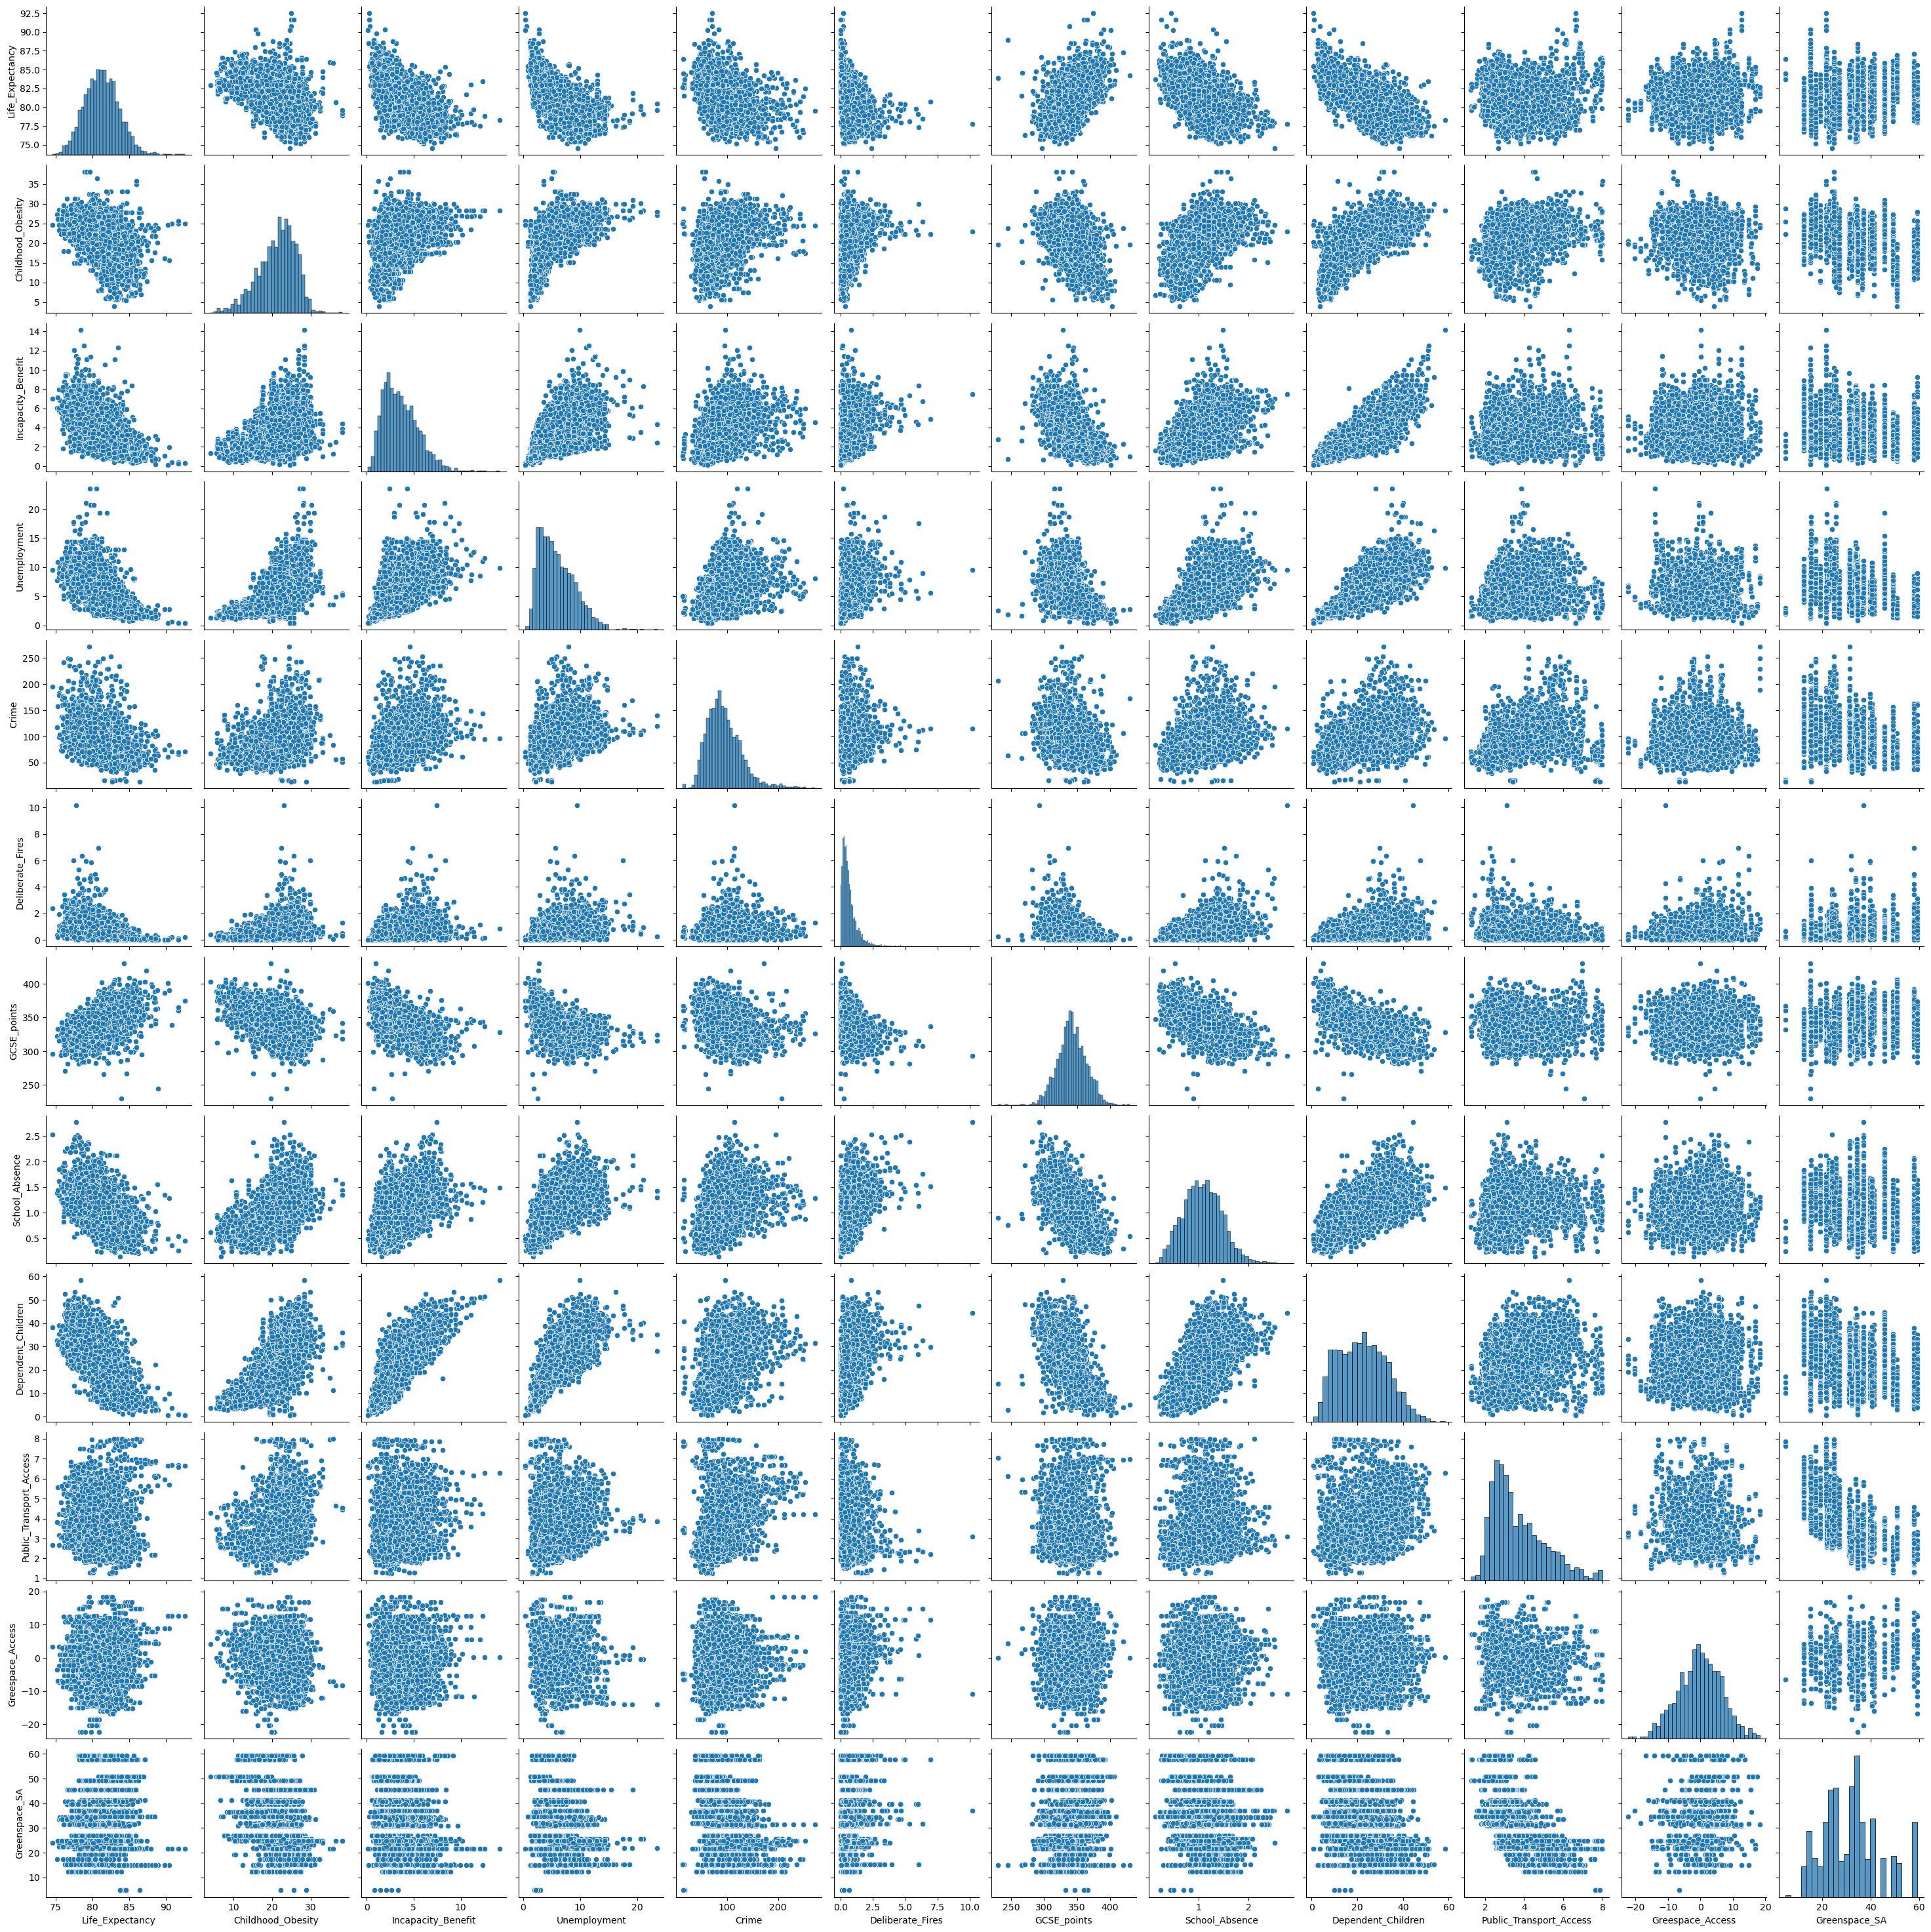

In [6]:
# Create a pairplot for all numeric variables
df_num = df.drop(columns=['New ward code', 'Ward', 'Borough', 'Year'])
sns.pairplot(df_num,  palette='Set1')
plt.show();

The pairplot shows that there is some skewness to the distribution of some of the variables that will need to be investigated. There are some variables that seems to be either positively or negatively correlated with life expectancy. The "Borough Greenspace Surface Area" variables shows some banding structure that should also be further investigated.

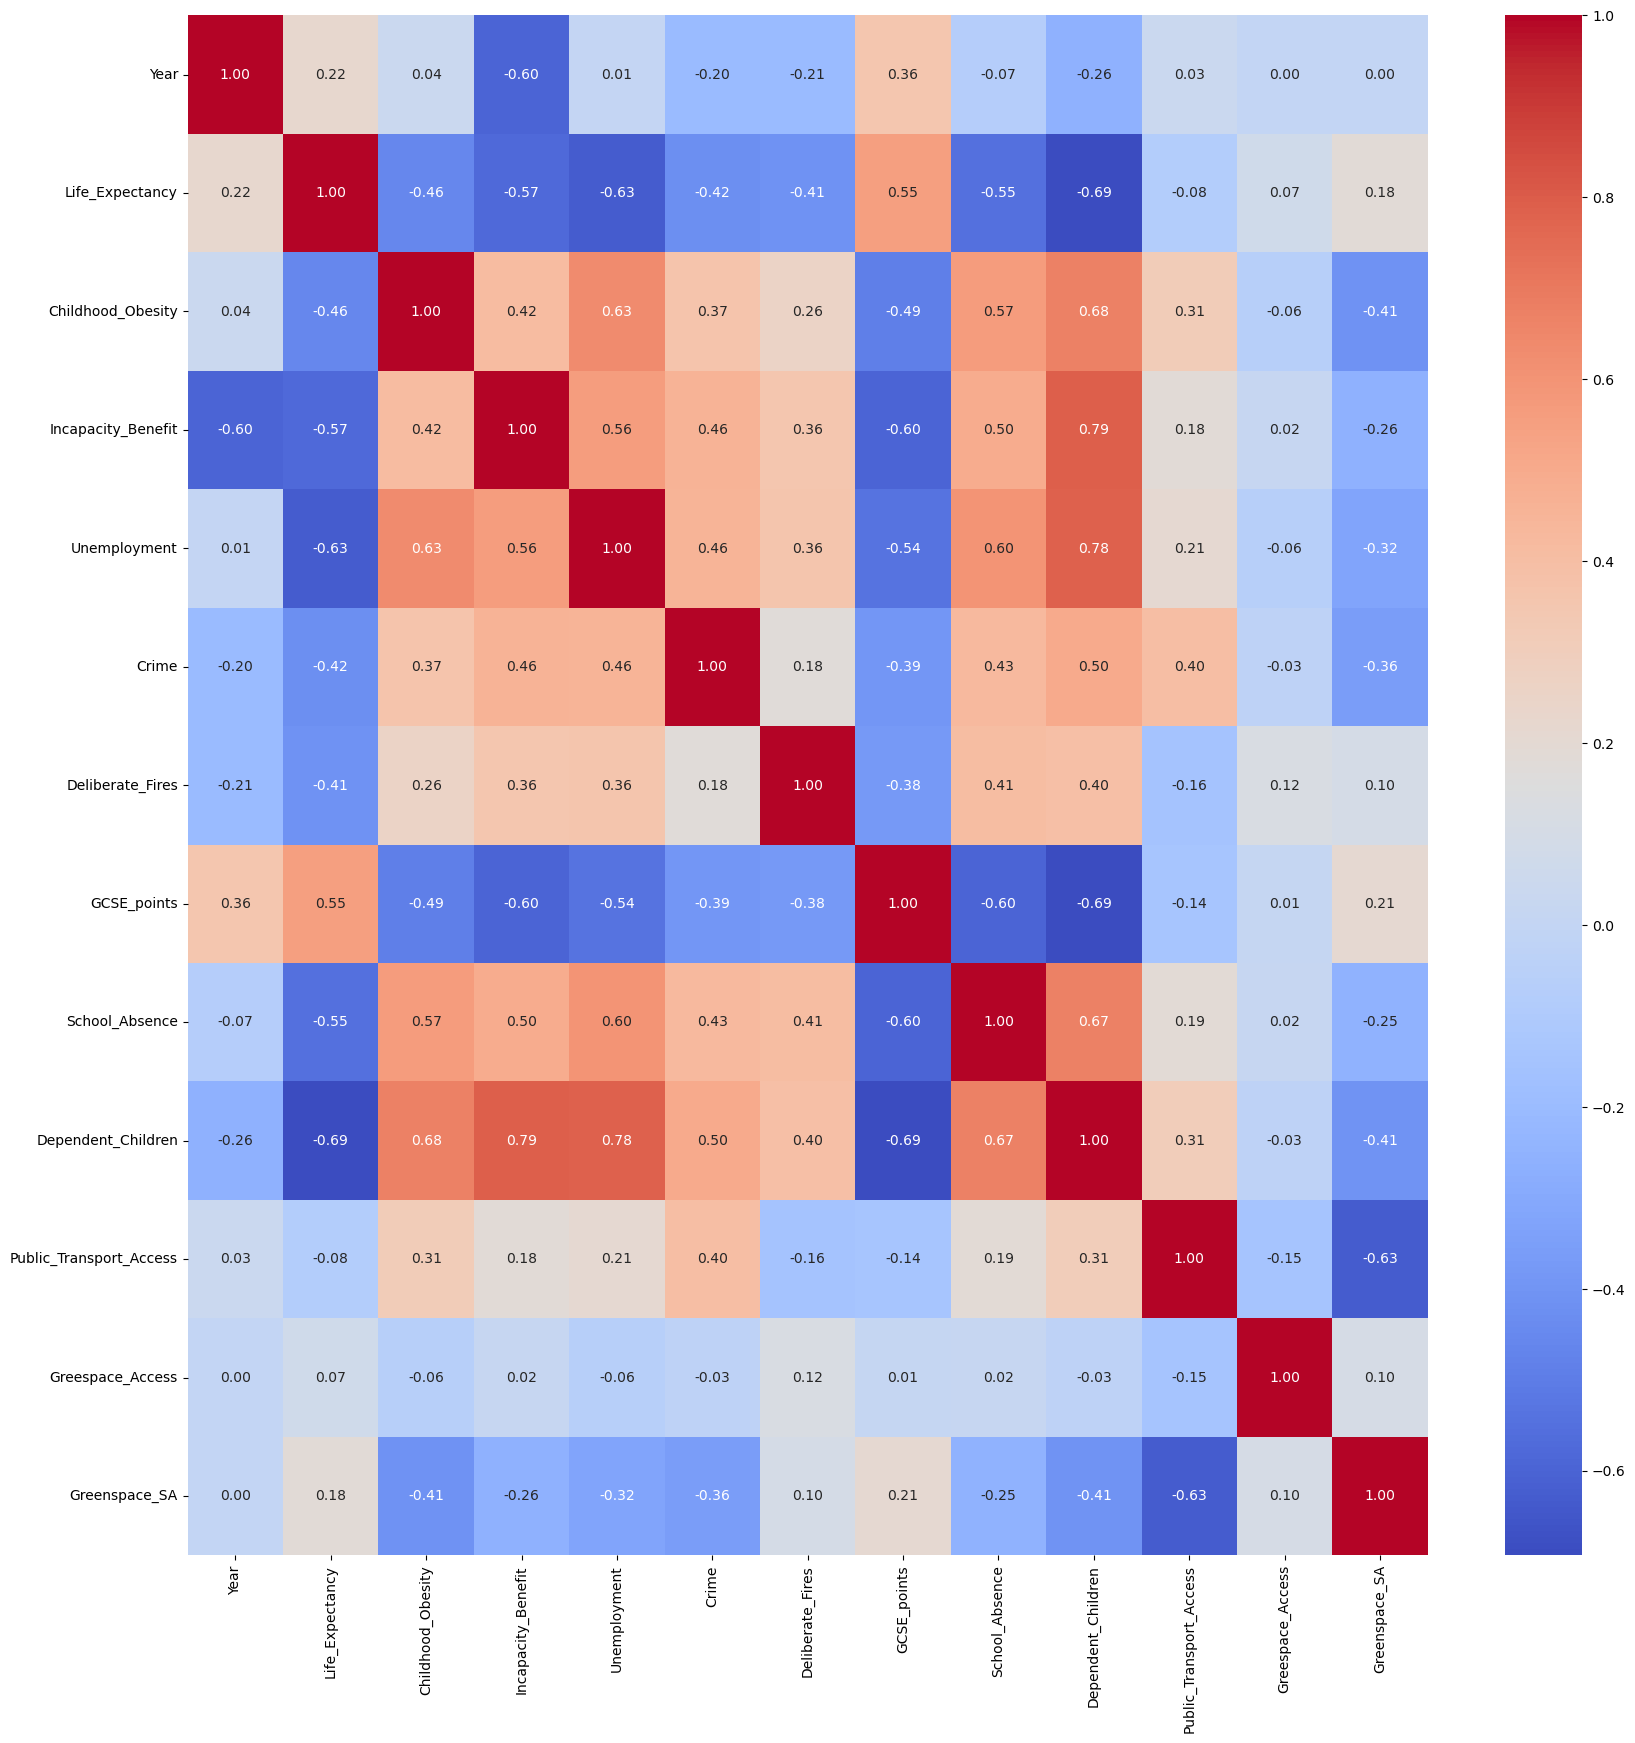

In [7]:
# Create a correlation heatmap for looking at the correlation between all variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm",fmt='.2f',)
plt.show();

The variables that appear to have the strongest negative correlation with life expectancy are dependent children, school absences, unemployment, and incapacity benefit, although a few others show weaker negative correlation. GCSE_points (elementary student test scores) shows some possible positive correlation with life expectancy. At this point, it does not appear that either metric of urban greenspace correlates with life expectancy. 

## Explore distribution of each variable
Before more closely examining correlations between variables, let's examine the distribution of each variable.

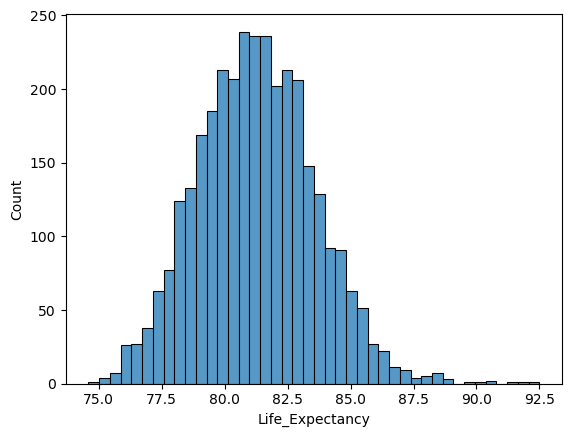

In [8]:
# Life expectancy will be the dependent variable when modeling the data
sns.histplot(df['Life_Expectancy'])
plt.show()


In [9]:
# Using the stats.normaltest() method, get an indication of whether the life expectancy data are normally distributed
lf_normal = stats.normaltest(df['Life_Expectancy'])
print(lf_normal)

NormaltestResult(statistic=52.63506943693014, pvalue=3.7191174572487054e-12)


While the life expectancy data look visually normal, the stats.normaltest indicates that they are not normally distributed. However, the data all look plausible and are within normal range for life expectancy.

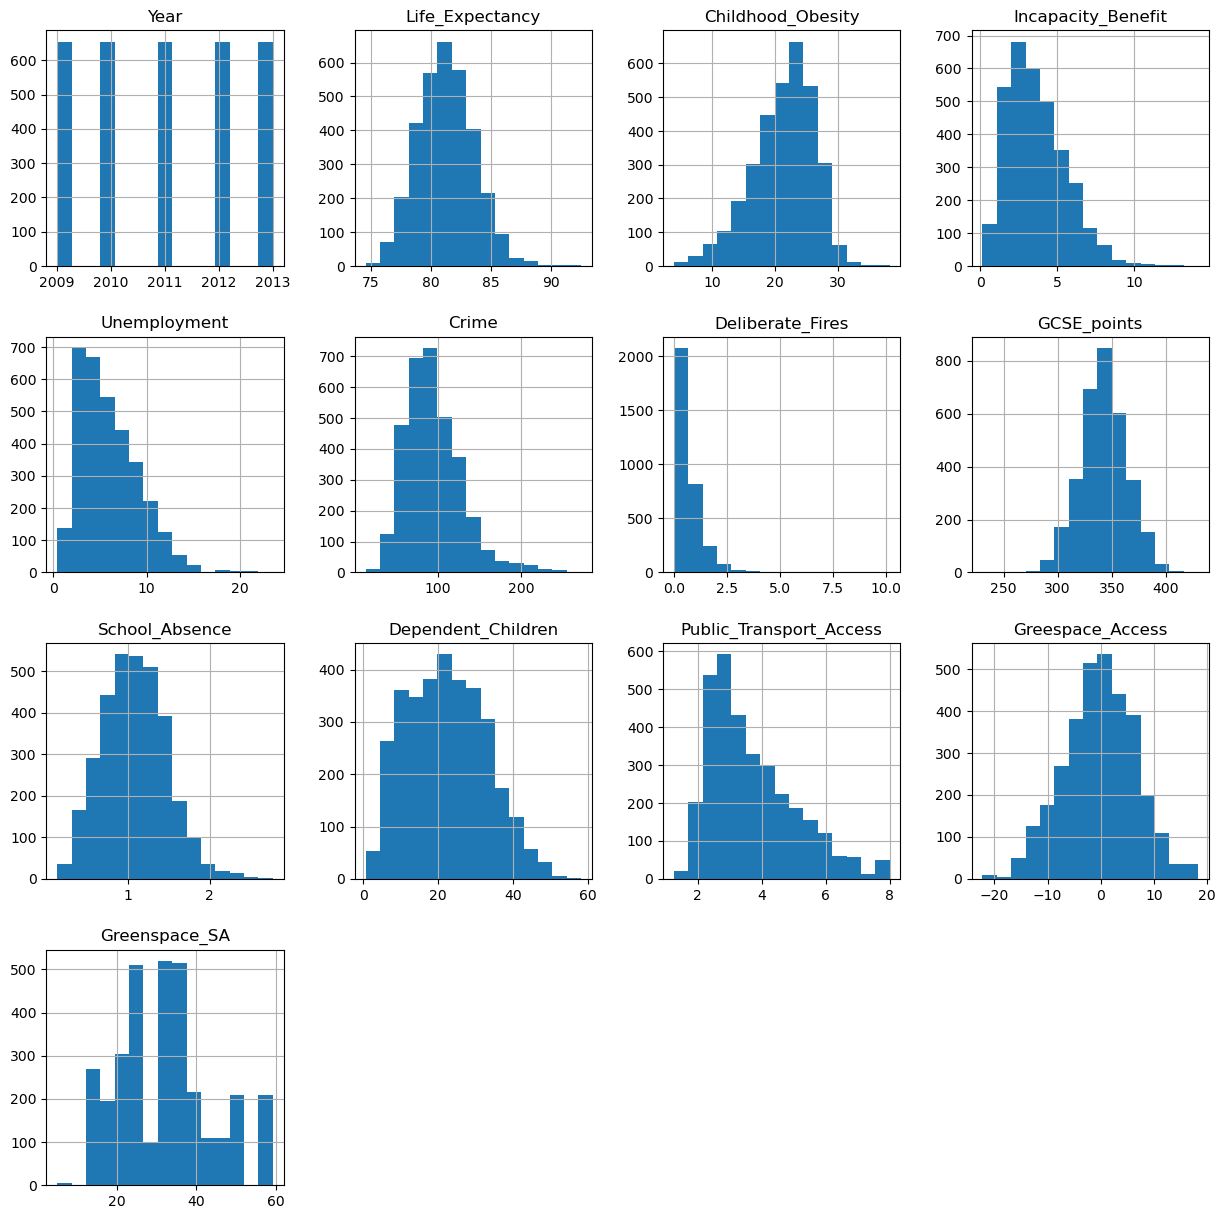

In [10]:
# Examine histogram of each variable
hist = df.hist(bins=15,figsize =(15,15))
plt.show()

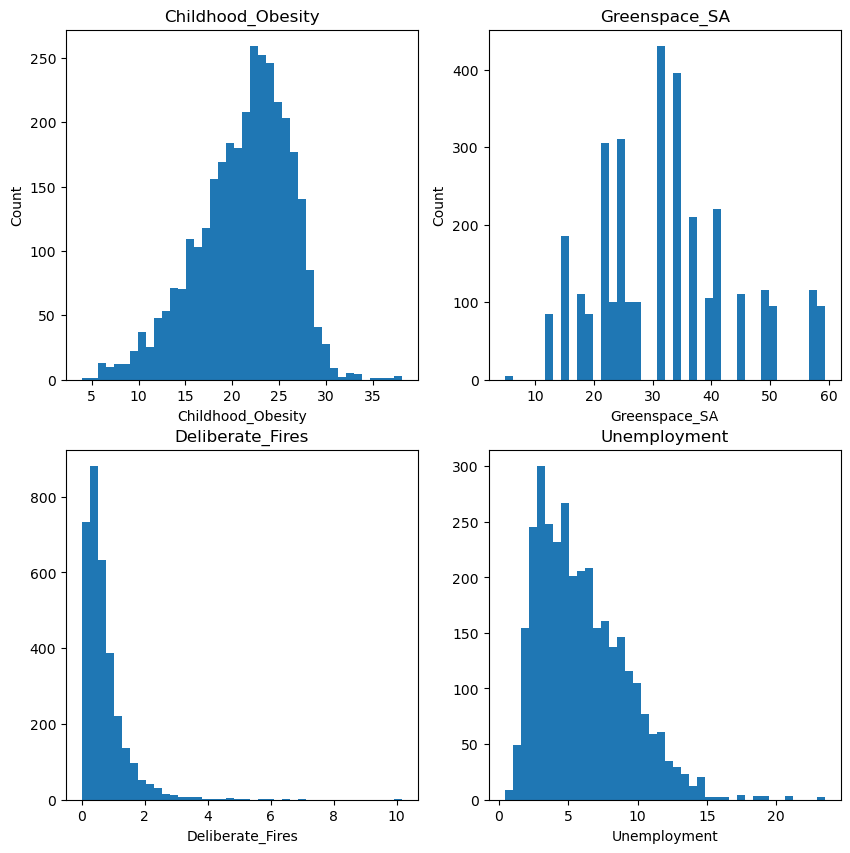

In [11]:
# Examine variables that look like they have skewed distributions 
# Create four subplots on 2 rows and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

ax[0,0].hist(df['Childhood_Obesity'], bins=40)
ax[0,0].set_title('Childhood_Obesity')
ax[0,0].set_xlabel('Childhood_Obesity')
ax[0,0].set_ylabel('Count')


ax[1,0].hist(df['Deliberate_Fires'], bins=40)
ax[1,0].set_title('Deliberate_Fires')
ax[1,0].set_xlabel('Deliberate_Fires')

ax[0,1].hist(df['Greenspace_SA'], bins=40)
ax[0,1].set_title('Greenspace_SA')
ax[0,1].set_xlabel('Greenspace_SA')
ax[0,1].set_ylabel('Count')

ax[1,1].hist(df['Unemployment'], bins=40)
ax[1,1].set_title('Unemployment')
ax[1,1].set_xlabel('Unemployment')

plt.show()

The distribution for deliberate_fires is especially skewed. Let's examine it with respect to life expectancy.

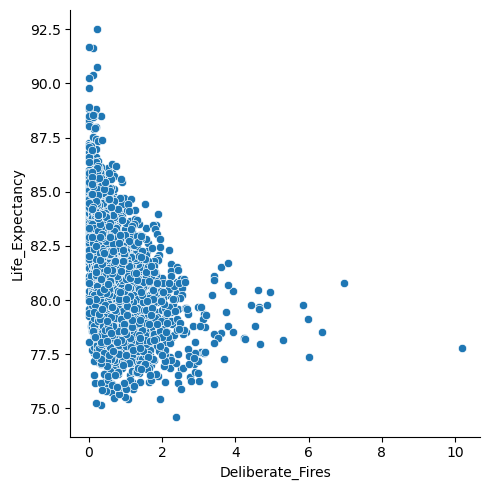

In [12]:
#Plot relationship between life expectancy and deliberate fires
sns.relplot(x='Deliberate_Fires', y='Life_Expectancy', data=df, kind="scatter")
plt.show();

In [13]:
# Transform variable to see if we can get a more normal distribution
# Square-root transform fire data
transform_fires = np.sqrt(df['Deliberate_Fires'])

# Add column to dataframe
df['root_Deliberate_Fires'] = transform_fires

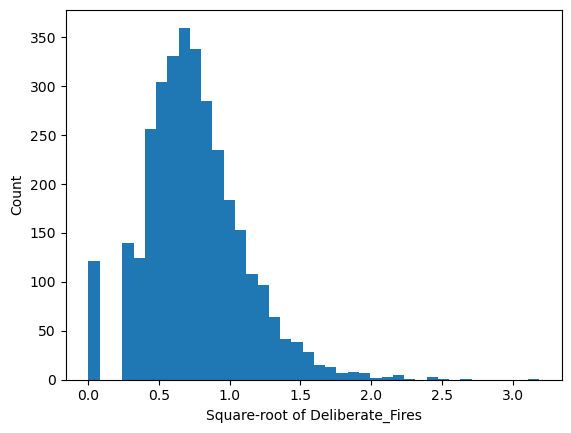

In [14]:
# Plot transformed data
plt.hist(transform_fires, bins=40)

#Label the axes 
plt.xlabel('Square-root of Deliberate_Fires')
plt.ylabel('Count')
plt.show()

### Examine data by Borough 
This is a categorical variables that might be of interest in my modeling. Does the Borough in which a person lives appear to correlate with life expectancy? Likely this is a variable that will be highly correlated with all of the features of the Borough itself (i.e. the other variables), but it's worth examining.

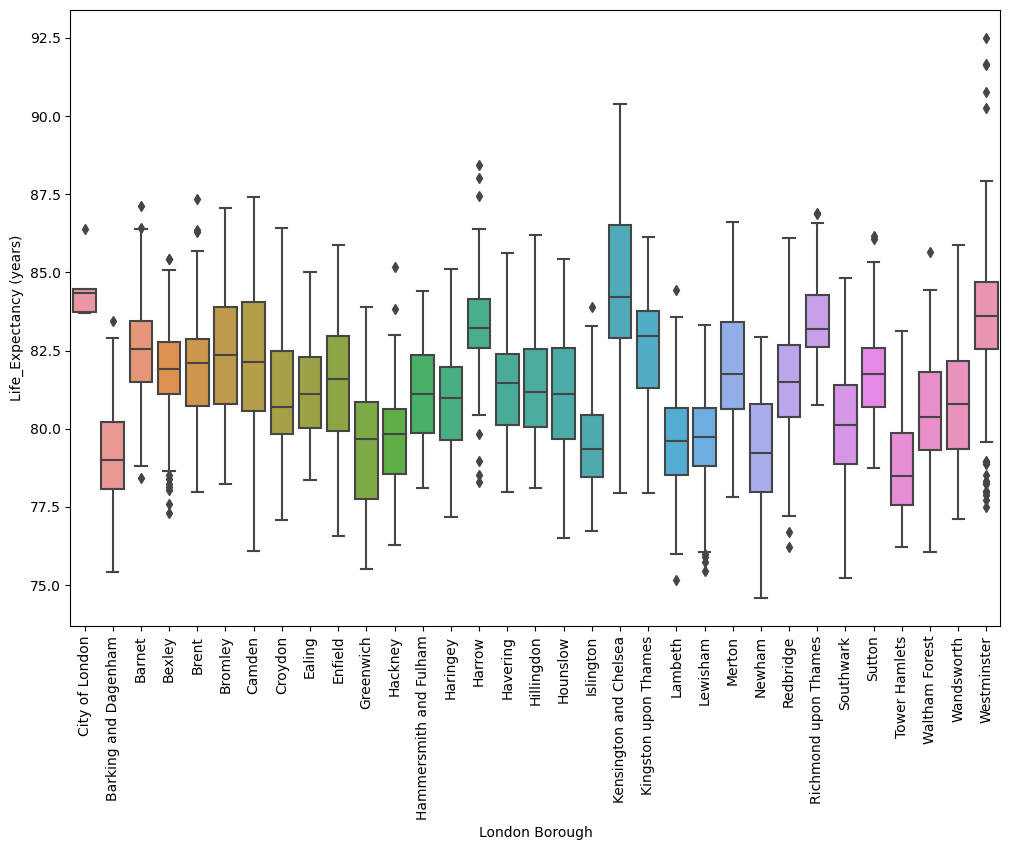

In [15]:
# Create a boxplot to see life expectancy by Borough
plt.subplots(figsize=(12, 8))
sns.boxplot(x='Borough', y='Life_Expectancy', data=df)
plt.xticks(rotation='vertical')
plt.ylabel('Life_Expectancy (years)')
plt.xlabel('London Borough');
plt.show()

There is definitely some variation in life expectancy by Borough, which likely has to do with the features that are associated with each Borough. Should I examine the covariance between Borough and some of the variables that show signs of strong correlation with life expectancy?

## Visualize notable correlations
The variables that appear to have the strongest negative correlation with life expectancy are dependent children, school absences, unemployment, and incapacity benefit. GCSE_points (elementary student test scores) shows some possible positive correlation with life expectancy. 

### First examine correlations between independent variables
The three variables of interest that show the highest correlation in the pairsplot are unemployment, dependent children, and incapacity benefit. Let's examine the relationship between these independent variables. 

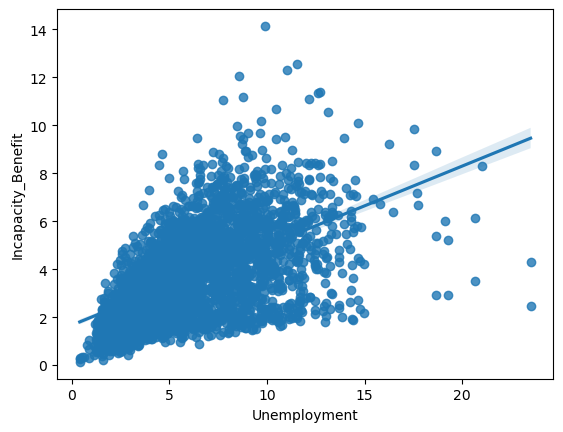

In [16]:
# Relationship between independent variables: Unemployment and Incapacity_Benefit
sns.regplot(x = 'Unemployment', y = 'Incapacity_Benefit', data=df)
plt.show();

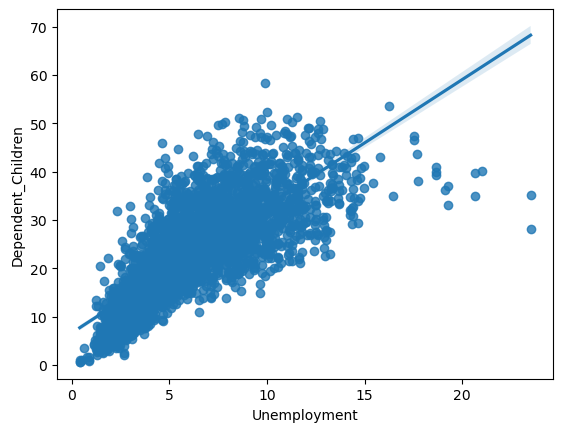

In [17]:
# Relationship between independent variables: Unemployment and Dependent_Children
sns.regplot(x = 'Unemployment', y = 'Dependent_Children', data=df)
plt.show();

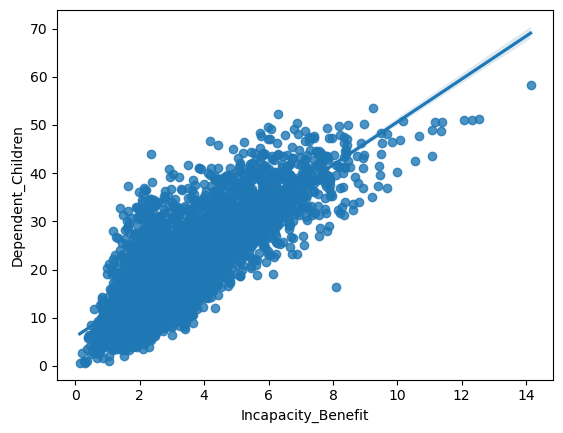

In [18]:
# Relationship between independent variables: Children and Incapacity_Benefit
sns.regplot(x = 'Incapacity_Benefit', y = 'Dependent_Children', data=df)
plt.show();

There is definitely positive correlation between these variables. When modeling, we should be aware of examining whether the model benefits from having all (or just one) of these explanatory variables.

### Examine correlations between dependent and independent variables 

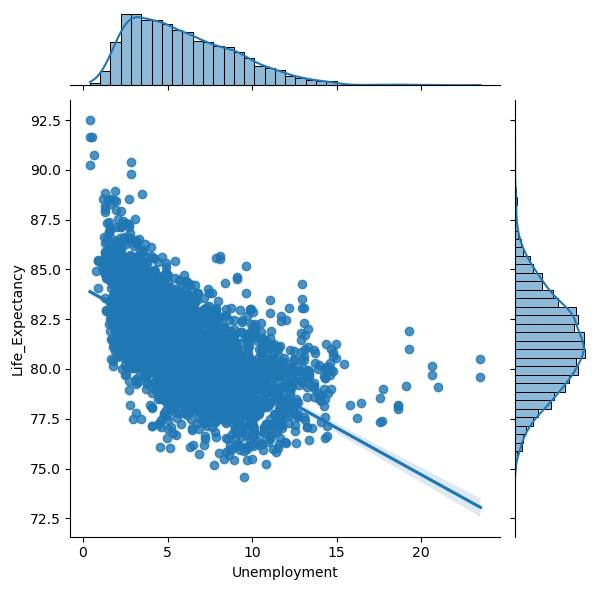

In [19]:
#Plot relationship between life expectancy and unemployment
sns.jointplot(x='Unemployment', y='Life_Expectancy', data=df, kind="reg")
plt.show();

The outliers in this plot are a bit skewed, and look like they could indicate a non-linear relationship. Would a transformation be worth exploring here? However, unemployment also covaries with several other metrics (incapacity benefits and dependent children), so we could also consider whether to omit this variable. 

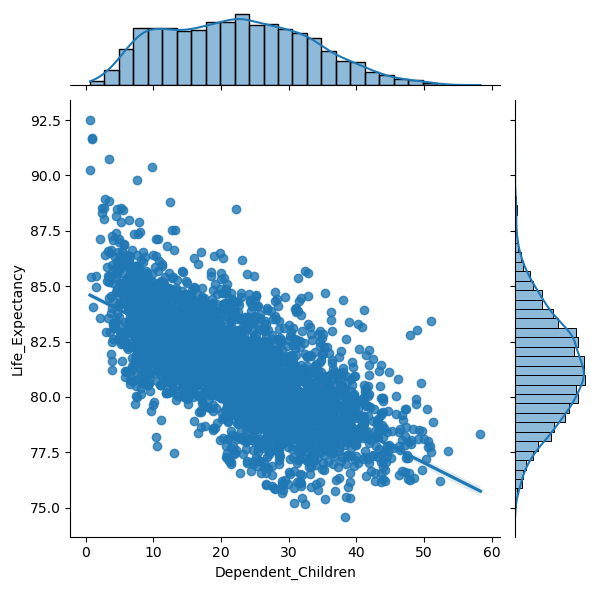

In [20]:
#Plot relationship between life expectancy and dependent children
sns.jointplot(x='Dependent_Children', y='Life_Expectancy', data=df, kind="reg")
plt.show();

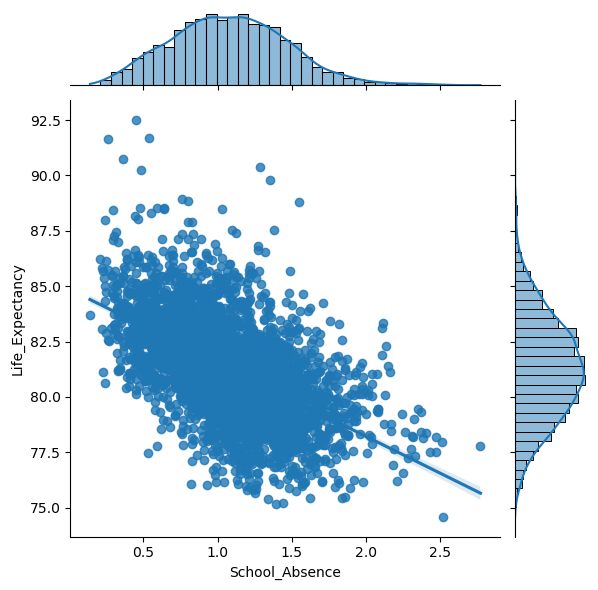

In [21]:
#Plot relationship between life expectancy and school absences
sns.jointplot(x='School_Absence', y='Life_Expectancy', data=df, kind="reg")
plt.show();

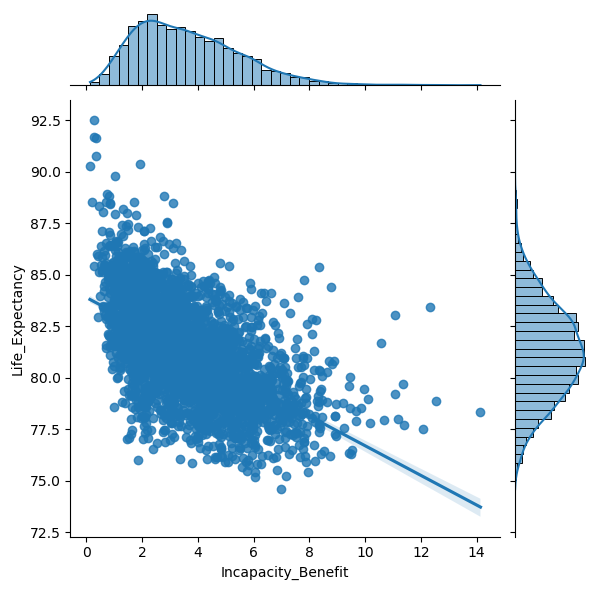

In [22]:
#Plot relationship between life expectancy and incapacity benefit
sns.jointplot(x='Incapacity_Benefit', y='Life_Expectancy', data=df, kind="reg")
plt.show();

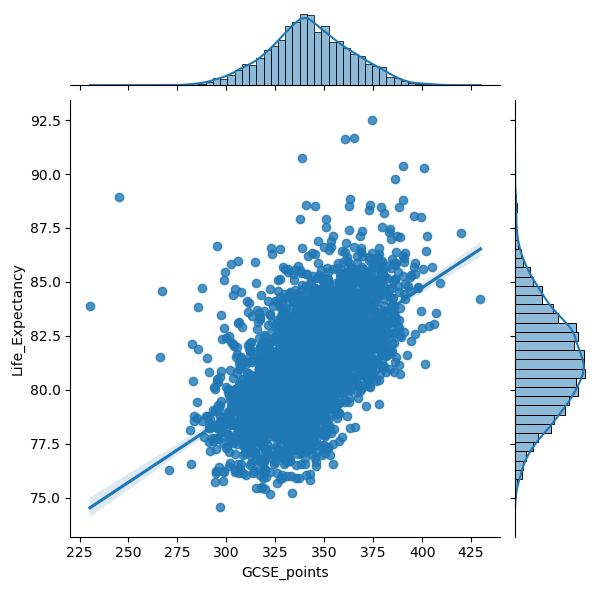

In [23]:
#Plot relationship between life expectancy and GCSE points
sns.jointplot(x='GCSE_points', y='Life_Expectancy', data=df, kind="reg")
plt.show();

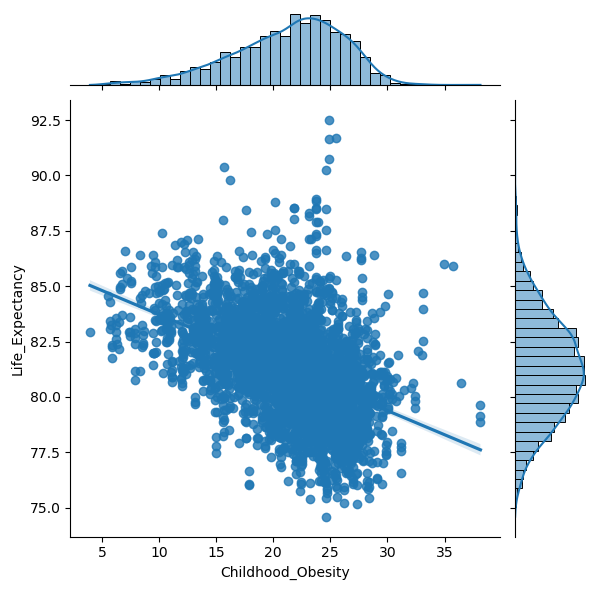

In [24]:
#Plot relationship between life expectancy and childhood obesity
sns.jointplot(x='Childhood_Obesity', y='Life_Expectancy', data=df, kind="reg")
plt.show();

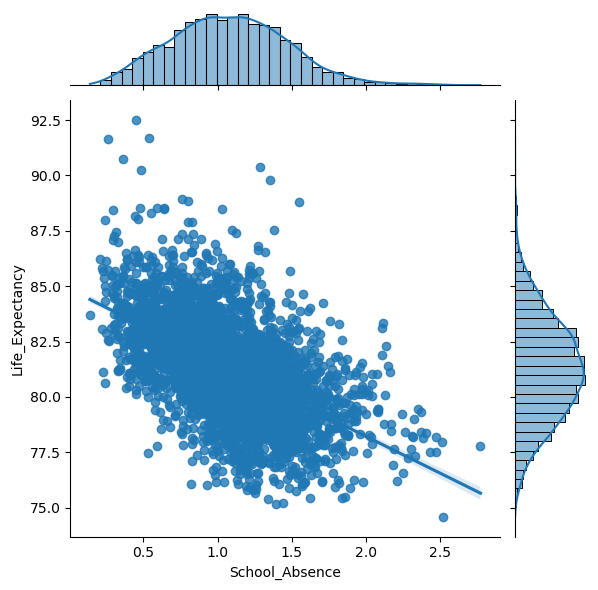

In [25]:
#Plot relationship between life expectancy and school absences
sns.jointplot(x='School_Absence', y='Life_Expectancy', data=df, kind="reg")
plt.show();

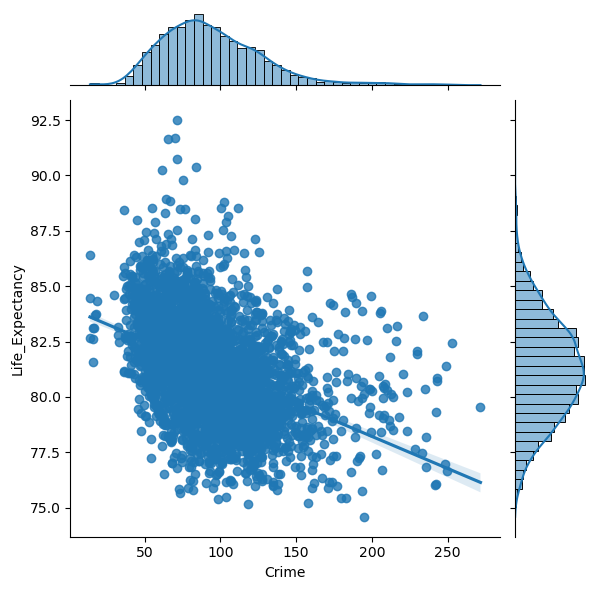

In [26]:
#Plot relationship between life expectancy and crime
sns.jointplot(x='Crime', y='Life_Expectancy', data=df, kind="reg")
plt.show();

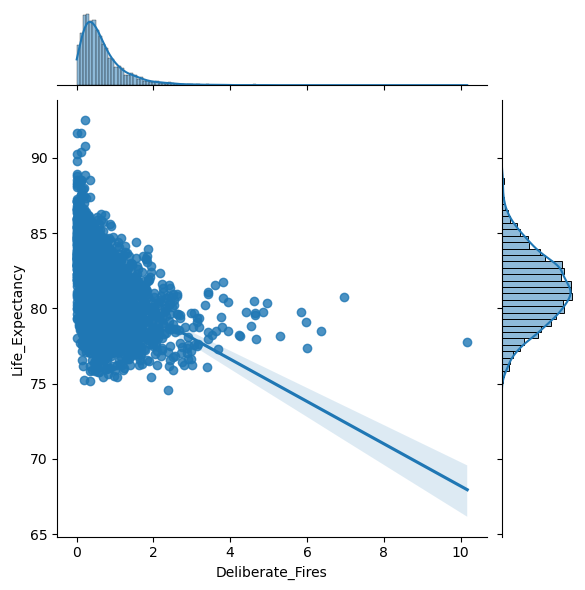

In [27]:
#Plot relationship between life expectancy and deliberate fires
sns.jointplot(x='Deliberate_Fires', y='Life_Expectancy', data=df, kind="reg")
plt.show();

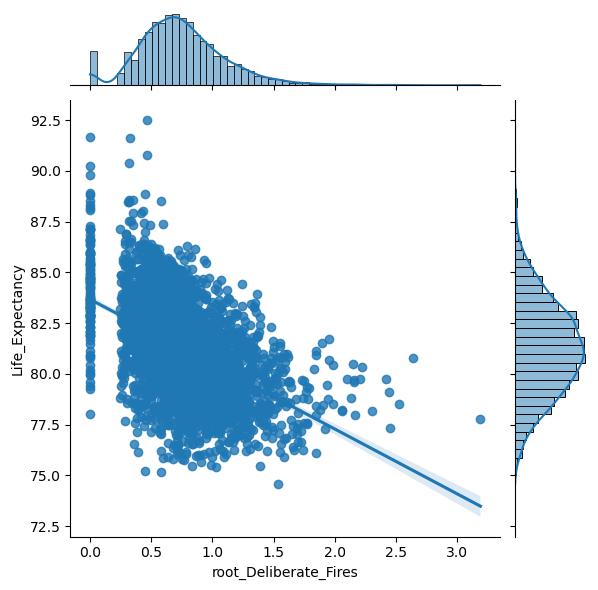

In [28]:
#Plot relationship between life expectancy and transformed data for deliberate fires
sns.jointplot(x='root_Deliberate_Fires', y='Life_Expectancy', data=df, kind="reg")
plt.show();

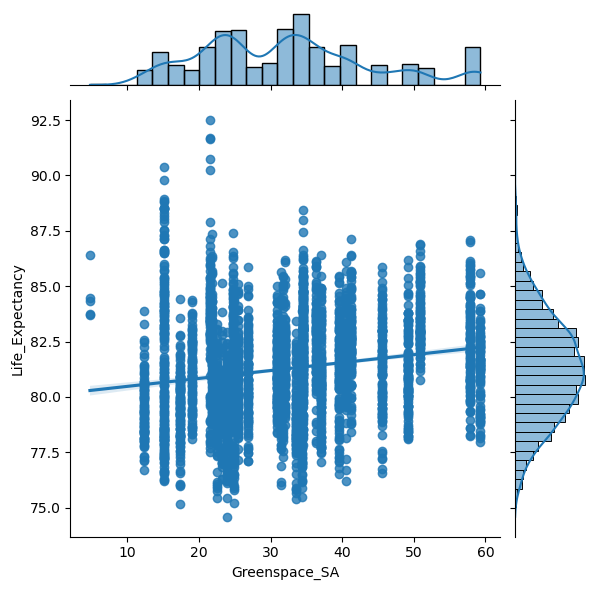

In [29]:
#Plot relationship between life expectancy and greenspace surface area
sns.jointplot(x='Greenspace_SA', y='Life_Expectancy', data=df, kind="reg")
plt.show();

## Summary of Correlations EDA

The EDA analysis revealed that the variables that have the strongest correlation with life expectancy are unemployment rate (-0.63), number of dependent children (-0.69), school absences (-0.55), incapacity benefit (-0.57), and GCSE points (+0.55). <br>
<br>
These correlations all make sense intuitively; the variables with negative correlation are all representative of hardship. Specifically, the "dependent children" metric represents the % of children living in out-of-work households, and "incapacity benefits" represents the disability claimant rate for that Borough. GCSE_points, the positive correlate, is an indication of dependent children doing well in school. <br>
<br>
In addition, there were several variables that showed a weaker correlation with life expectancy, including childhood obesity (-0.46), number of deliberate fires (-0.41), and crime rate (-0.42). Greenspace surface area shows only a very slight correlation (+0.18) and will likely not be important in the final model. <br>
<br>
It's worth noting that there is some covariance between several of the explanatory variables. Unemployment, incapacity benefits, and dependent children are all positively correlated with each other. 